In [20]:
import pandas as pd
from functools import reduce 
from operator import add
from yellowbrick.contrib.statsmodels import StatsModelsWrapper
from stepshift import views
import sklearn
import numpy as np
from views_partitioning.data_partitioner import DataPartitioner
from views_partitioning.legacy import Period 
from matplotlib import pyplot as plt

In [12]:
data = pd.read_parquet("data.parquet")
data.head()

ln_ged_sb  ln_ged_sb_decay_12_time_since  ln_ged_sb_splag_1  \
month_id pg_id                                                                
1        62356        0.0                            0.0                0.0   
         79599        0.0                            0.0                0.0   
         79600        0.0                            0.0                0.0   
         79601        0.0                            0.0                0.0   
         80317        0.0                            0.0                0.0   

                ln_ged_ns_decay_12_time_since  ln_ged_os_decay_12_time_since  \
month_id pg_id                                                                 
1        62356                            0.0                            0.0   
         79599                            0.0                            0.0   
         79600                            0.0                            0.0   
         79601                            0.0                            0.0   
         80317                            0.0                            0.0   

                ln_ged_ns_splag_1  ln_ged_os_splag_1  ln_ged_sb_tlag_1  \
month_id pg_id                                                           
1        62356                0.0                0.0               0.0   
         79599                0.0                0.0               0.0   
         79600                0.0                0.0               0.0   
         79601                0.0                0.0               0.0   
         80317                0.0                0.0               0.0   

                ln_ged_sb_lag_2  ln_ged_sb_lag_3  ...  ln_ged_sb_lag_8  \
month_id pg_id                                    ...                    
1        62356              0.0              0.0  ...              0.0   
         79599              0.0              0.0  ...              0.0   
         79600              0.0              0.0  ...              0.0   
         79601              0.0              0.0  ...              0.0   
         80317              0.0              0.0  ...              0.0   

                ln_ged_sb_lag_9  ln_ged_sb_lag_10  ln_ged_sb_lag_11  \
month_id pg_id                                                        
1        62356              0.0               0.0               0.0   
         79599              0.0               0.0               0.0   
         79600              0.0               0.0               0.0   
         79601              0.0               0.0               0.0   
         80317              0.0               0.0               0.0   

                ln_ged_sb_lag_12  ln_ged_ns_tlag_1  ln_ged_os_tlag_1  \
month_id pg_id                                                         
1        62356               0.0               0.0               0.0   
         79599               0.0               0.0               0.0   
         79600               0.0               0.0               0.0   
         79601               0.0               0.0               0.0   
         80317               0.0               0.0               0.0   

                ln_ged_sb_tlag_1_splag_1  ln_ged_ns_tlag_1_splag_1  \
month_id pg_id                                                       
1        62356                       0.0                       0.0   
         79599                       0.0                       0.0   
         79600                       0.0                       0.0   
         79601                       0.0                       0.0   
         80317                       0.0                       0.0   

                ln_ged_os_tlag_1_splag_1  
month_id pg_id                            
1        62356                       0.0  
         79599                       0.0  
         79600                       0.0  
         79601                       0.0  
         80317                       0.0  

[5 rows x 24 columns]

In [21]:

model =  views.StepshiftedModels(sklearn.linear_model.PoissonRegressor(max_iter=100000),range(1,13),"ln_ged_sb")
partitioner = DataPartitioner.from_legacy_periods(
        [Period(
                name = "A",
                train_start = 1,
                train_end = 200,
                predict_start = 201,
                predict_end = 400
            )
        ]
    )

In [23]:
model.fit(partitioner("A","train",data))
pred = model.predict(partitioner("A","predict",data))

<IPython.core.display.Javascript object>


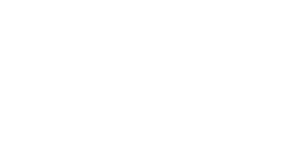

Text(0.5, 1.0, 'Coefficients for each step-model')

In [24]:
coefficients = [m.coef_[0] for m in model._models.values()]
fig,ax = plt.subplots()
ax.plot(range(1,13),coefficients)
ax.set_xticks(range(1,13))
ax.set_xlabel("Step")
ax.set_ylabel("Coefficient")
ax.set_title("Coefficients for each step-model")

<IPython.core.display.Javascript object>


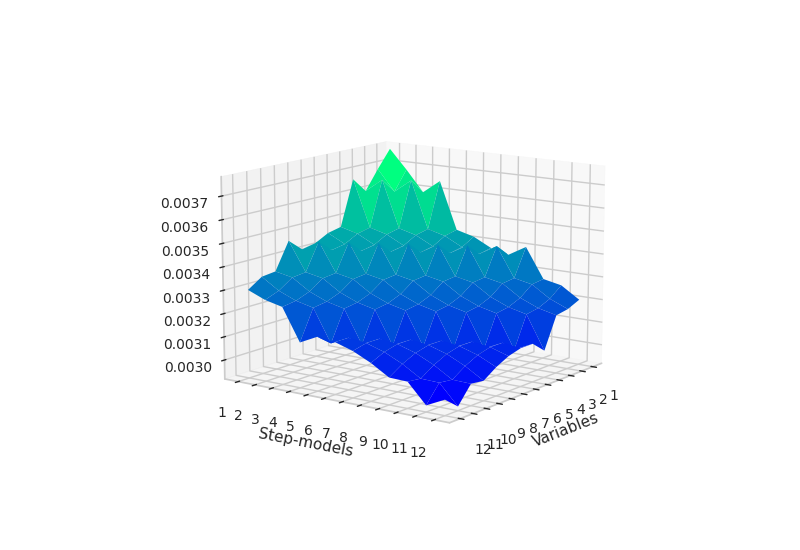

x: (12, 12)
y: (12, 12)
z: (12, 12)


Text(0.5, 0, 'Step-models')

In [26]:
%matplotlib notebook
ax = plt.axes(projection="3d")
coefficients = [m.coef_[6:18] for m in model._models.values()]

n_models = len(coefficients)
n_coefs = len(coefficients[0])

X,Y = np.meshgrid(np.linspace(1,n_coefs,n_coefs),
                 np.linspace(1,n_models,n_models))
Z = np.array(coefficients)

for name,values in zip("xyz",(X,Y,Z)):
    print(f"{name}: {values.shape}")
    
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap="winter")
ax.set_xticks(range(1,n_coefs+1))
#ax.set_xticklabels(data.columns[7:19])
ax.set_xlabel("Variables")
ax.set_yticks(range(1,n_models+1))
ax.set_ylabel("Step-models")